In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print(df.readmitted.value_counts())

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


In [5]:
df = pd.read_csv('data/diabetic_data.csv', encoding = 'latin1',low_memory=False)
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [6]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101766 non-null object
diag_3                      101766 non-null object
number_diagnoses            101766 non-null int64
max_glu_serum               10176

## 1.A. Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

this is above

## 1.B. Identify groups of features in your data that should be combined into cross-product features. 

After looking at all the useful features in our dataset, we need to find features that can be combined into cross-product features. Unfortunately, most of the medications and illnesses in the dataset require extreme domain knowledge outside the scope of this lab. However, this still leaves us with a few options to use commmon intuition to discover features that should logically be grouped together. These include:
- [race, gender]: Rage and gender may not be the deciding factor in our model's predictions. Howectr, these two factors likely serve to give a very good rough estimate. This may be due to genetics and socioeconomic factors.
- [age, diag1]: Age and the Patient's primary diagnosis are two that seem logically grouped. The main reason someone is admitted to the hospital in the first place may have something to do with whether or not they return. Croossing this feature with age might give more importance to someone's age when determining how resilient someone is to a certain illlness (due to old or young age) and their return to the hostpital. 

## 1.C. Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

Since we have reduced the dataset to a binary classification problem, we can put it simply that the importance of reducing false-negatives is significant. If we are medical preofessionals giving patients predictions on whether or not they might have somplications related to their dibetes in the future, it would be best to over-prepare the patient for the worst-case scenario (by giving them a false-positive diagnosis/result), than it would be to tell them that they are healthy, only to risk their lives by not preparing them for a future illness. Having said this, we will be implementing a Recall scoing model. This is because it is equally important whether or not the model's predictions are true-positive or true-negative, but it necessary to penalize the model for giving false-negative results that might under-prepare the patient for planning their future health.

## 1.D. Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

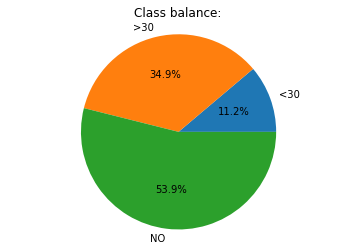

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

uniq, label = np.unique(df.readmitted, return_inverse=True)

plt.pie(np.bincount(label), labels=uniq, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class balance:')
plt.show()

Now that we understand our class distribution after looking at a visual, we can make an educated decision of how to perform cross validateion. Since our 

LukeWood:

For our cross validation method we decided to train on the balanced set, and then test using an set with the original class balance. Instead of using the sklearn stratified shuffle split we will use the pandas sample method to get a stratified sample of each data frame. We chose to do this so that we can split our test set and train set separately. We also chose to do a shuffle split instead of stratified k-folds due to how large our dataset is and stratified shuffle split is a bit faster than k-folds. It is also the recommended method by the source where we received our data from.